In [80]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import matplotlib.pyplot as plt
import random


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [81]:
# Define Device class
class Device:
    def __init__(
        self,
        name,
        data,
        computational_power,
        memory_capacity,
        energy_efficiency,
        network_latency,
    ):
        self.name = name
        self.data = data
        self.computational_power = computational_power
        self.memory_capacity = memory_capacity
        self.energy_efficiency = energy_efficiency
        self.network_latency = network_latency
        self.heuristic_score = 0
        self.model = None

    def train_model(self, num_epochs=50, batch_size=8):
        self.model = build_model()
        features, labels = self.data
        self.model.fit(
            features, labels, epochs=num_epochs, batch_size=batch_size, verbose=0
        )

    def compute_accuracy(self, test_features, test_labels):
        if self.model:
            _, accuracy = self.model.evaluate(test_features, test_labels, verbose=0)
            return accuracy
        else:
            return 0.0


def federated_averaging(selected_devices, num_epochs=1, batch_size=8):
    global_model = build_model()  # Build a global model
    num_layers = len(global_model.layers)

    # Lists to store accuracy and loss data
    accuracy_data = []
    loss_data = []

    for _ in range(num_epochs):
        for device in selected_devices:
            device.model = global_model
            history=device.model.fit(
                device.data[0], device.data[1], epochs=25, batch_size=batch_size, verbose=0
            )  # Train local model on device data

            # Log accuracy and loss
            accuracy = history.history['accuracy'][-1]
            loss = history.history['loss'][-1]
            accuracy_data.append(accuracy)
            loss_data.append(loss)
            
        # Compute federated average for each layer
        global_weights = global_model.get_weights()
        # print(global_weights)
        for layer_idx in range(num_layers):
            layer_weights = np.mean(
                [device.model.get_weights()[layer_idx] for device in selected_devices],
                axis=0,
            )
            global_weights[layer_idx] = layer_weights
        global_model.set_weights(
            global_weights
        )  # Update global model with federated average  

    # Plot accuracy and loss graph for local models
    plt.figure(figsize=(6,4))
    plt.plot(accuracy_data, label='Accuracy')
    plt.plot(loss_data, label='Loss')
    plt.xlabel('Epoch')
    plt.legend()
    # plt.title('Accuracy and Loss Over Training (Local Models)')
    plt.show()
    
    return global_model



# Build a neural network model
def build_model():
    model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    # Dense(32, activation='relu'),
    Dense(3, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [82]:
# Load and preprocess Iris data
iris = load_iris()
features = iris.data
labels = iris.target


# Split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)


# Calculate the number of samples per device (not needed for Iris)
num_devices = 30
samples_per_device = len(train_features_scaled) // num_devices


# Create simulated device data (only one device for Iris)
device_data = [
    (
        f"Device{i+1}",
        (train_features_scaled[i * samples_per_device: (i + 1) * samples_per_device],
         train_labels[i * samples_per_device: (i + 1) * samples_per_device]),
        np.random.uniform(0.1, 1.0),
        np.random.uniform(0.15, 1.0),
        np.random.uniform(0.1, 1.0),
        np.random.uniform(0.2, 1.0),
    )
    for i in range(num_devices)
]

# device_data = [
#     (
#         f"Device{i+1}",
#         (train_features_scaled, train_labels),
#         np.random.uniform(0.1, 1.0),
#         np.random.uniform(0.15, 1.0),
#         np.random.uniform(0.1, 1.0),
#         np.random.uniform(0.2, 1.0),
#     )
#     for i in range(num_devices)
# ]

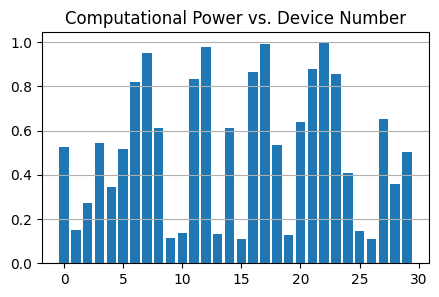

In [83]:
device_numbers = np.arange(len(device_data))
computational_efficiency = [device[2] for device in device_data]

# Plotting bar graph of device values
plt.figure(figsize=(5, 3))
plt.bar(device_numbers, computational_efficiency)
# plt.xlabel("Device Number")
plt.title("Computational Power vs. Device Number")
# plt.xticks(device_numbers, [f'{i+1}' for i in range(len(device_numbers))])
plt.grid(axis="y")
plt.show()

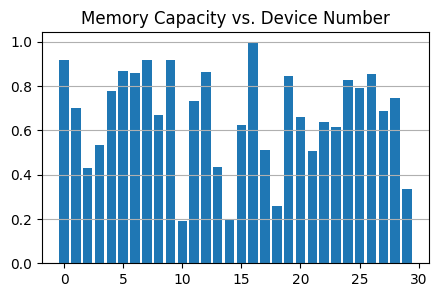

In [84]:
device_numbers = np.arange(len(device_data))
memory_efficiency = [device[3] for device in device_data]

# Plotting bar graph of device values
plt.figure(figsize=(5, 3))
plt.bar(device_numbers, memory_efficiency)
# plt.xlabel("Device Number")
plt.title("Memory Capacity vs. Device Number")
# plt.xticks(device_numbers, [f'{i+1}' for i in range(len(device_numbers))])
plt.grid(axis="y")
plt.show()

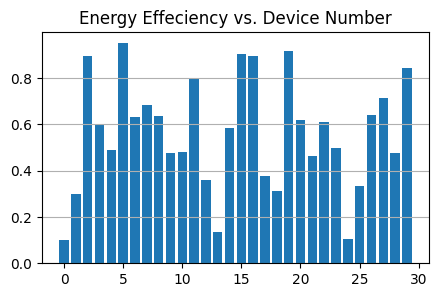

In [85]:
device_numbers = np.arange(len(device_data))
energy_effeciency = [device[4] for device in device_data]

# Plotting bar graph of device values
plt.figure(figsize=(5, 3))
plt.bar(device_numbers, energy_effeciency)
# plt.xlabel("Device Number")
plt.title("Energy Effeciency vs. Device Number")
# plt.xticks(device_numbers, [f'{i+1}' for i in range(len(device_numbers))])
plt.grid(axis="y")
plt.show()

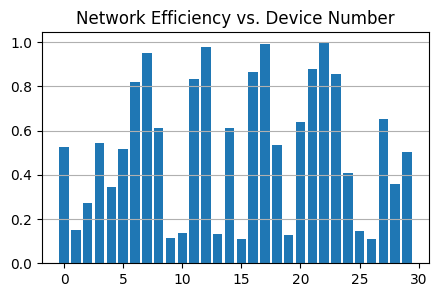

In [86]:
device_numbers = np.arange(len(device_data))
network_efficiency = [device[2] for device in device_data]

# Plotting bar graph of device values
plt.figure(figsize=(5, 3))
plt.bar(device_numbers, network_efficiency)
# plt.xlabel("Device Number")
plt.title("Network Efficiency vs. Device Number")
# plt.xticks(device_numbers, [f'{i+1}' for i in range(len(device_numbers))])
plt.grid(axis="y")
plt.show()

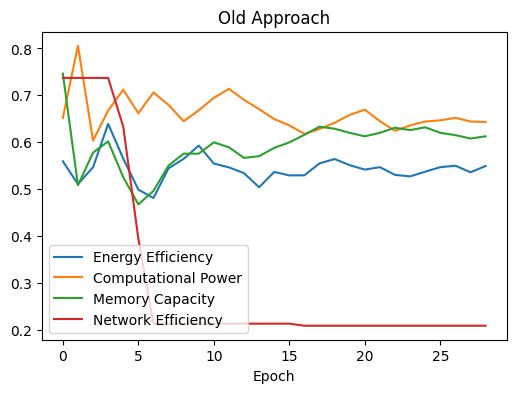

In [69]:
# Number of epochs
num_epochs = 30

# Lists to store selected devices and accuracy scores in each epoch
selected_devices_history = []
accuracy_scores_history = []

overall_computation = []
overall_EnergyEfficiency = []
overall_NetworkLatency = []
overall_memory=[]

# Check if device is selected or not
select_device_binary = {-1}

# Apply heuristic function ( f(h)=0 )
alpha = beta = gamma = delta = 0
selected_devices = [Device(*device) for device in device_data]

# Calculate overall accuracy over time
curr_computation = 0
curr_efficiency = 0
curr_latency = 1
curr_memory=0

# Random selection
for epoch in range(num_epochs):
    device_num = -1
    while device_num in select_device_binary and len(select_device_binary) < len(
        selected_devices
    ):
        device_num = random.choice(range(0, num_devices))

    select_device_binary.add(device_num)

    if device_num != -1:
        # Retrieve the selected device from the list of devices
        device_to_append = selected_devices[device_num]

        # Update current efficiency and latency
        curr_efficiency += device_to_append.energy_efficiency
        overall_EnergyEfficiency.append(
            curr_efficiency / (len(select_device_binary) - 1)
        )

        curr_computation += device_to_append.computational_power
        overall_computation.append(
            curr_computation / (len(select_device_binary) - 1)
        )

        curr_memory += device_to_append.memory_capacity
        overall_memory.append(
            curr_memory / (len(select_device_binary) - 1)
        )

        curr_latency = min(curr_latency, device_to_append.network_latency)
        overall_NetworkLatency.append(curr_latency)

        # Append the selected device to history
        selected_devices_history.append(device_to_append)


# Plotting the energy efficiency scores over epochs
plt.figure(figsize=(6, 4))
plt.plot(
    overall_EnergyEfficiency,label='Energy Efficiency'
)
plt.plot(overall_computation, label='Computational Power')
plt.plot(overall_memory, label='Memory Capacity')
plt.plot(overall_NetworkLatency, label='Network Efficiency')
plt.legend()
plt.title("Old Approach")
plt.xlabel("Epoch")
plt.show()


# Plotting the energy efficiency scores over epochs
# plt.figure(figsize=(5, 3))
# plt.plot(
#     range(1, len(select_device_binary)),
#     overall_EnergyEfficiency,
    
# )
# plt.xlabel("Epoch")
# plt.ylabel("Energy Efficiency ")
# plt.title("Energy Efficiency over Epochs")
# plt.show()

# # Plotting the Network Latency scores over epochs
# plt.figure(figsize=(5, 3))
# plt.plot(
#     range(1, len(select_device_binary)),
#     overall_NetworkLatency,
    
# )
# plt.xlabel("Epoch")
# plt.ylabel("Network Efficiency")
# plt.title("Network Efficiency over Epochs")
# plt.show()

# # Plotting the Network Latency scores over epochs
# plt.figure(figsize=(5, 3))
# plt.plot(
#     range(1, len(select_device_binary)),
#     overall_computation,
    
# )
# plt.xlabel("Epoch")
# plt.ylabel("Computaional power")
# plt.title("Computaional power over Epochs")
# plt.show()

# # Plotting the Network Latency scores over epochs
# plt.figure(figsize=(5, 3))
# plt.plot(
#     range(1, len(select_device_binary)),
#     overall_memory,
    
# )
# plt.xlabel("Epoch")
# plt.ylabel("Memory Capacity")
# plt.title("Memory Capacity over Epochs")
# plt.show()

c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


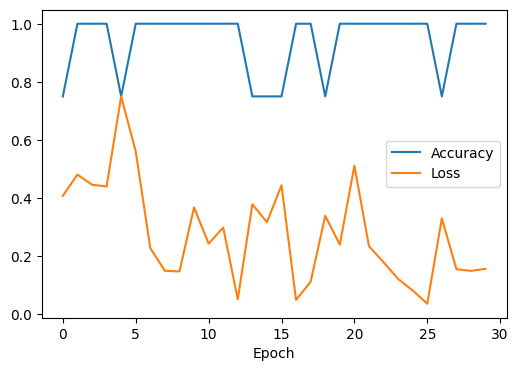

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8667 - loss: 0.2193
Test Accuracy: 0.8666666746139526


In [70]:
#Train Global Model
# for device in selected_devices:
#     device.train_model()
#     test_loss, test_accuracy = device.model.evaluate(test_features_scaled, test_labels, verbose=0)
#     print(f"Device {device.name} Loss:", test_loss)
#     print(f"Device {device.name} Accuracy:", test_accuracy)

# Perform federated averaging using the selected devices
global_model = federated_averaging(selected_devices)

# Evaluate global model (optional)
_, test_accuracy = global_model.evaluate(test_features_scaled, test_labels)

# Print loss and accuracy
print("Test Accuracy:", test_accuracy)

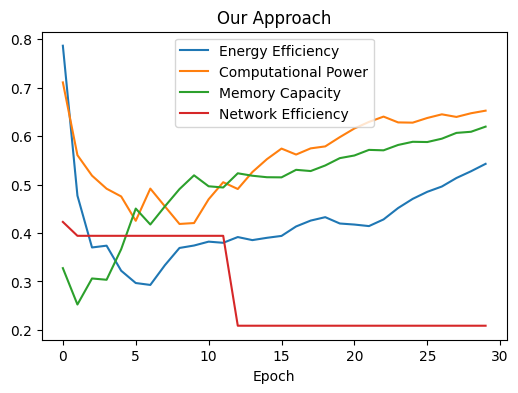

In [71]:
# Lists to store selected devices and accuracy scores in each epoch
overall_EnergyEfficiency = []
overall_NetworkLatency = []
overall_computation = []
overall_memory = []


# objective function
# F = accuracy(threshold) + heuristic
# (maximize it)

# Apply heuristic function
alpha = beta = gamma = delta = 0.25


# Heuristic function
def heuristic(selected_devices):
    (
        total_computational_efficiency,
        total_memory_efficiency,
        total_energy_efficiency,
        total_network_efficiency,
    ) = (0, 0, 0, 0)

    for device_num in range(len(selected_devices)):
        device = selected_devices[device_num]
        total_computational_efficiency += device.computational_power
        total_memory_efficiency += device.memory_capacity
        total_energy_efficiency += device.energy_efficiency
        total_network_efficiency = min(total_network_efficiency, device.network_latency)
    value = (
        alpha * (total_computational_efficiency / len(selected_devices))
        + beta * (total_memory_efficiency / len(selected_devices))
        + gamma * (total_energy_efficiency / len(selected_devices))
        + delta * total_network_efficiency
    )
    return value


selected_devices = [Device(*device) for device in device_data]


# Our Algorithm to select devices optimally
H, FH = 0, 0

curr_efficiency = 0
curr_latency = 1
curr_memory=0
curr_computation=0

final_selected_devices = []
curr_selected = []

num_devices_to_select = 30


for initial_device in range(len(selected_devices)):
    curr_selected = []
    curr_selected.append(selected_devices[initial_device])

    for _ in range(num_devices_to_select - 1):
        cur_minh, currsp_device = 1, selected_devices[initial_device]
        for device_num in range(len(selected_devices)):
            device_to_append = selected_devices[device_num]
            if device_to_append not in curr_selected:
                curr_selected.append(device_to_append)
                h = heuristic(curr_selected)
                if h < cur_minh:
                    cur_minh = h
                    currsp_device = device_to_append
                curr_selected.remove(device_to_append)
        curr_selected.append(currsp_device)

    H = heuristic(curr_selected)
    if H > FH:
        FH = H
        final_selected_devices = curr_selected


for device_num in range(len(final_selected_devices)):
    device = final_selected_devices[device_num]

    curr_efficiency += device.energy_efficiency
    overall_EnergyEfficiency.append(curr_efficiency / (device_num + 1))

    curr_latency = min(curr_latency, device.network_latency)
    overall_NetworkLatency.append(curr_latency)
    
    curr_computation += device.computational_power
    overall_computation.append(curr_computation / (device_num + 1))

    curr_memory += device.memory_capacity
    overall_memory.append(curr_memory / (device_num + 1))


# Plotting the energy efficiency scores over epochs
plt.figure(figsize=(6, 4))
plt.plot(
    overall_EnergyEfficiency,label='Energy Efficiency'
)
plt.plot(overall_computation, label='Computational Power')
plt.plot(overall_memory, label='Memory Capacity')
plt.plot(overall_NetworkLatency, label='Network Efficiency')
plt.legend()
plt.title("Our Approach")
plt.xlabel("Epoch")
plt.show()

# Plotting the Network Latency scores over epochs
# plt.figure(figsize=(5, 3))
# plt.plot(
#     range(1, len(final_selected_devices) + 1),
#     overall_NetworkLatency,
# )
# plt.xlabel("Epoch")
# plt.ylabel("Network Efficiency")
# plt.title("Network Efficiency over Epochs")
# plt.show()

# plt.figure(figsize=(5, 3))
# plt.plot(
#     range(1, len(final_selected_devices) + 1),
#     overall_computation,
# )
# plt.xlabel("Epoch")
# plt.ylabel("Computational Power")
# plt.title("Computational Power over Epochs")
# plt.show()

# plt.figure(figsize=(5, 3))
# plt.plot(
#     range(1, len(final_selected_devices) + 1),
#     overall_memory,
# )
# plt.xlabel("Epoch")
# plt.ylabel("Memory Capacity")
# plt.title("Memory Capacity over Epochs")
# plt.show()

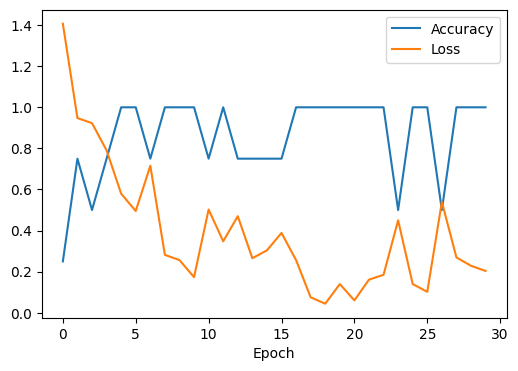

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9667 - loss: 0.1637
Test Accuracy: 0.9666666388511658


In [72]:
#Train Global Model
# for device in final_selected_devices:
#     device.train_model()
#     test_loss, test_accuracy = device.model.evaluate(test_features_scaled, test_labels, verbose=0)
#     print(f"Device {device.name} Loss:", test_loss)
#     print(f"Device {device.name} Accuracy:", test_accuracy)

# Perform federated averaging using the final_selected devices
global_model = federated_averaging(final_selected_devices)

# Evaluate global model (optional)
_, test_accuracy = global_model.evaluate(test_features_scaled, test_labels)

# Print loss and accuracy
print("Test Accuracy:", test_accuracy)